# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("bank.csv")

# Check the data. Check shape, data type, and info

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
Bank                   515 non-null int64
DD                     515 non-null int64
Withdrawals            515 non-null int64
Deposits               515 non-null int64
Branch Area in sqft    515 non-null int64
avg daily walkins      515 non-null int64
dtypes: int64(6)
memory usage: 24.2 KB


In [4]:
# There are 515 records with 6 columns and no null values.

# Checking Summary Statistic

In [5]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bank,515.0,258.000000,148.811962,1.0,129.5,258.0,386.5,515.0
DD,515.0,232.252427,66.648815,120.0,169.5,237.0,291.0,350.0
Withdrawals,515.0,150.693204,56.897777,10.0,103.0,152.0,200.0,247.0
Deposits,515.0,81.687379,28.596912,33.0,58.0,80.0,105.0,212.0
Branch Area in sqft,515.0,2934.669903,437.062831,1200.0,2675.0,2960.0,3300.0,3650.0
avg daily walkins,515.0,598.603883,83.487891,380.0,537.5,601.0,657.5,838.0


# Checking for Duplicates

In [6]:
data_df_duplicated = data_df[data_df.duplicated(keep='first')]
print("The duplicate rows in our dataframe are as follows:\n")
print(data_df_duplicated)

The duplicate rows in our dataframe are as follows:

Empty DataFrame
Columns: [Bank, DD, Withdrawals, Deposits, Branch Area in sqft, avg daily walkins]
Index: []


In [7]:
# Empty dataframe in result means there were no duplicate rows to begin with

# Scaling the data

In [8]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [9]:
# Creating an object for the StandardScaler function
sc = StandardScaler()

In [10]:
# Scaling the dataset using standard scalar function
scaled_df = sc.fit_transform(data_df)

# Creating Clusters using KMeans

### Build a KMeans model having 2 Clusters

In [11]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters=2,random_state=0)

In [12]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Check cluster Output for all the observations

In [13]:
# Get the labels
k_means.labels_

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

### Calculate within Cluster Sum of Squares

In [14]:
k_means.inertia_

2448.0305920669534

### Form clusters with K = 1,3,4,5,6 and compare the WSS ( within cluster sum of squares)

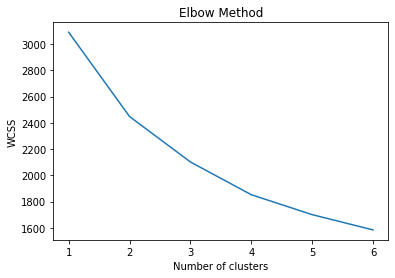

In [15]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Calculate WSS for other values of K ( can use range of K = 1 to 20) - Elbow Method

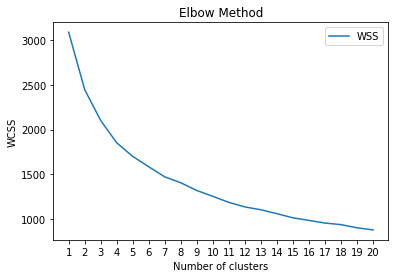

In [31]:
wss = []
for k in range(1,21):
    kmeans2 = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans2.fit(scaled_df)
    wss.append(kmeans2.inertia_)  
plt.plot(range(1,21), wss, label = 'WSS')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(range(1,21))
plt.ylabel('WCSS')
plt.legend()
plt.show()

## Build a KMeans model with K=3

In [17]:
kmeans3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

### Use silhouette score to evaluate the above model ( 3 clusters)

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [19]:
# Calculating silhouette_score
preds3 = kmeans3.fit_predict(scaled_df)
score3 = silhouette_score(scaled_df,preds3)
print("The silhouette score for k-means cluster model with k = 3 is:",score3)

The silhouette score for k-means cluster model with k = 3 is: 0.17805387367814587


# Build a KMeans model with K=4

In [20]:
kmeans4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

### Use silhouette score to evaluate the above model (4 clusters)

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
preds4 = kmeans4.fit_predict(scaled_df)
score4 = silhouette_score(scaled_df,preds4)
print("The silhouette score for k-means cluster model with k = 4 is:",score4)

The silhouette score for k-means cluster model with k = 4 is: 0.18601645296883526


Appending Clusters to the original dataset

In [22]:
data_df['labels'] = preds4

# Cluster Profiling

In [23]:
data_df['labels'].value_counts().sort_index()

0    121
1    116
2    143
3    135
Name: labels, dtype: int64

In [35]:
clust_profile=data_df.drop(['Bank'],axis=1)
clust_profile=clust_profile.groupby('labels').mean()
clust_profile['freq']=data_df.labels.value_counts().sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
labels,,,,,,
0,286.380165,193.504132,84.933884,2622.066116,698.264463,121
1,163.629310,117.086207,75.646552,3034.353448,492.387931,116
2,289.000000,102.713287,76.363636,3116.993007,598.489510,143
3,182.592593,192.022222,89.607407,2936.074074,600.666667,135


# Mention your insights

<b>Clusters can be defined as follows:</b>

- Cluster 0: Small size bank with highest walkins and Withdrawals, high depoists and large DD
- Cluster 1: Large size bank with the least walkins, deposits and DD, and low withdrawals (smallest cluster)
- Cluster 2: Large size bank with more number of walkins and highest DD, but the least withdrawals and less Deposits (largest cluster)
- Cluster 3: Large size bank with less walkins, DD but highest Deposit and high withdrawals

We are seeing 4 clusters divided per our analysis above, but the divide is not clear. We'll use boxplots for further insight.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x166BBF10>,
      dtype=object)

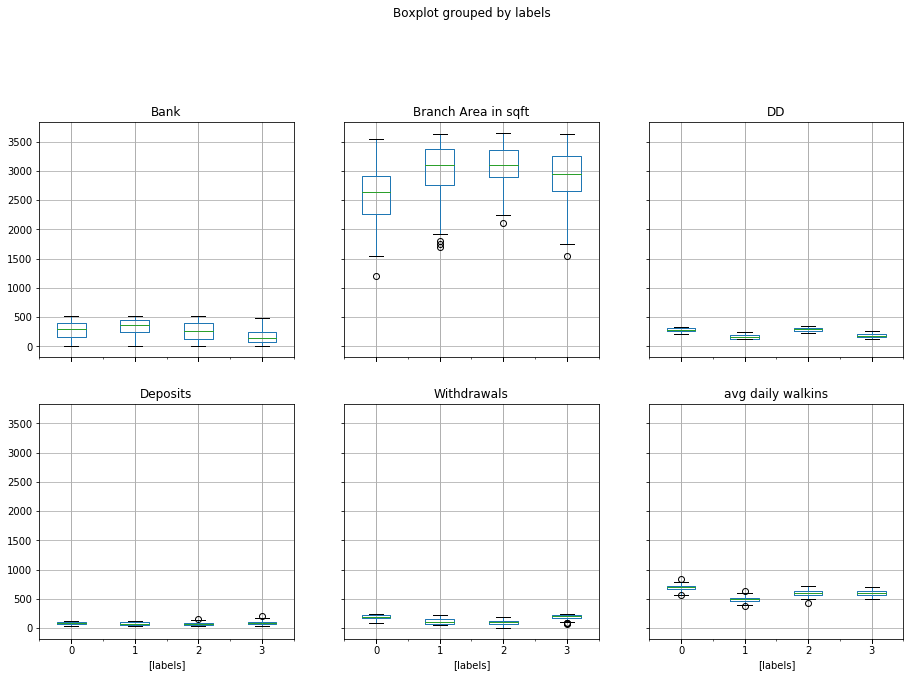

In [37]:
data_df.boxplot(by = 'labels',  layout=(4,3), figsize=(15,20))

We can see clearly that there's a lot of overlap in features for the different clusters formed, which tells us that maybe k=4 is not the optimal number of clusters.

In [39]:
km_silhouette = []
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=0).fit(scaled_df)
    preds = km.predict(scaled_df)
    silhouette = silhouette_score(scaled_df,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.1904781075292592
Silhouette score for number of cluster(s) 3: 0.17805387367814587
Silhouette score for number of cluster(s) 4: 0.18601645296883526
Silhouette score for number of cluster(s) 5: 0.1795928308811522
Silhouette score for number of cluster(s) 6: 0.17564627705639968
Silhouette score for number of cluster(s) 7: 0.18156725685172928
Silhouette score for number of cluster(s) 8: 0.17143994246067598
Silhouette score for number of cluster(s) 9: 0.1764863822521238
Silhouette score for number of cluster(s) 10: 0.17317342452098286
Silhouette score for number of cluster(s) 11: 0.1803418336889252
Silhouette score for number of cluster(s) 12: 0.18512710155653134
Silhouette score for number of cluster(s) 13: 0.17771543090019462
Silhouette score for number of cluster(s) 14: 0.17724119037618236
Silhouette score for number of cluster(s) 15: 0.1811373826816732
Silhouette score for number of cluster(s) 16: 0.18119821261509955
Silhouette score for nu

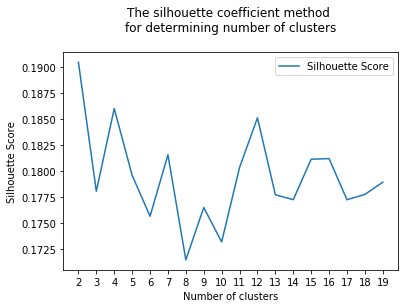

In [40]:
plt.plot(range(2,20), km_silhouette, label = 'Silhouette Score')
plt.title('The silhouette coefficient method \nfor determining number of clusters\n')
plt.xlabel('Number of clusters')
plt.xticks(range(2,20))
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

The elbow plot above with the Silhouette scores vs number of clusters gives us confirmation that k=4 is one of the best options for this data, but we can go for better Silhouette score coefficient value at k=2.